In [1]:
import sys
sys.path.append('/import/silo2/aloe8475/Documents/edamame')

In [2]:
from scipy.io import loadmat, savemat
from scipy.stats import kurtosis, skew
from scipy.spatial import distance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import datetime
import networkx as nx
from edamame import *
from tqdm import tqdm_notebook
import os
import edamame.core.wires as wires
from random import choice
from IPython.core.debugger import set_trace
# import nct
import bct
import pandas as pd

import pickle 
import _pickle as cPickle
import gzip


In [3]:
def compressed_pickle(obj, filename,protocol=-1):
    with gzip.open(filename, 'wb') as f:
        cPickle.dump(obj, f, protocol)
def decompress_pickle(file):
    with gzip.open(file, 'rb') as f:
        loaded_object = cPickle.load(f,encoding="bytes") #change this for python 2
        return loaded_object
    
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [4]:
#Define Save Location
saveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Networks/'
saveFig='/import/silo2/aloe8475/Documents/CODE/Data/Figures/Functional Connectivity/'

## Generate ER Networks

Load NWN networks and then generate random networks using the same degree distribution

### Different Densities

In [22]:
# name='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/VaryingDensity300NW_NWN.pkl'
name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VoltageSweep_DensityNetworks_NWN_NLT.pkl'
print('Loading NLT Voltage Sweep Results')
file = open(name, 'rb')
[resultsNWN] = pickle.load(file)

name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VoltageSweep_DensityNetworks_NWN_NKMAX_MC.pkl'
print('Loading MC Voltage Sweep Results')
file = open(name, 'rb')
[resultsNWN_MC,idx] = pickle.load(file)

name='/import/silo2/aloe8475/Documents/CODE/Analysis/Functional Connectivity/Functional Tasks/VaryingDensity300NWset2_NWN.pkl'
print('Loading NWN Networks, MC and NLT Results')
file = open(name, 'rb')
[NWN] = pickle.load(file)

Loading NLT Voltage Sweep Results
Loading MC Voltage Sweep Results
Loading NWN Networks, MC and NLT Results


In [185]:
avgDeg=[[] for i in range(len(NWN))]
for i in tqdm(range(len(NWN))):
    for j in range(len(NWN[i])):
        avgDeg[i].append(np.mean(np.array(nx.from_numpy_matrix(NWN[i][j]['adj_matrix']).degree())[:,1]))
avgDegNames=[]
for i in range(len(avgDeg)):
    avgDegNames.append(np.round(np.mean(avgDeg[i],axis=0)))

In [23]:
networks=[]
for i in range(len(NWN)):
    for j in range(len(NWN[i])):
        networks.append(NWN[i][j])

In [41]:
adjMat=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN')
adjMat1=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN')

In [33]:
G[4].number_of_edges()

599

In [37]:
# GENERATE RANDOM GRAPHS VIA EDGE SWAPPING (MAINTAIN DEGREE DISTRIBUTION)
degDist=[]
G=[]
adjMat=[]
for i in tqdm(range(len(networks))):
#     degDist.append(np.array([j for j in networks[i]['Graph Theory']['Degree']]).T[1].tolist())
#     G.append(nx.configuration_model(degDist[i],seed=seeds[i]))
#     G[i] = nx.Graph(G[i])
    G.append(nx.from_numpy_array(networks[i]['adj_matrix']))
    G[i]=nx.double_edge_swap(G[i],nswap=500,max_tries=500000)
    G[i].remove_edges_from(list(nx.selfloop_edges(G[i])))
    G[i]=max(connected_component_subgraphs(G[i]), key=len)
    adjMat.append(nx.adjacency_matrix(G[i]))

KeyboardInterrupt: 

In [57]:
# GENERATE RANDOM GRAPHS WITH SAME NUMBER OF NODES + EDGES
G1=[]
OG=[]
adjMat1=[]
temp=[]
for i in tqdm(range(len(networks))):
    OG.append(nx.from_numpy_array(networks[i]['adj_matrix']))
#     temp=nx.dense_gnm_random_graph(OG[i].number_of_nodes(),OG[i].number_of_edges())
    temp=nx.dense_gnm_random_graph(OG[i].number_of_nodes(),OG[i].number_of_edges())
    while len(list(connected_component_subgraphs(temp))[0]) < len(OG[i]):
        temp=nx.dense_gnm_random_graph(OG[i].number_of_nodes(),OG[i].number_of_edges())
    G1.append(temp)
    G1[i]=max(connected_component_subgraphs(G1[i]), key=len)
    adjMat1.append(nx.adjacency_matrix(G1[i]))

IndexError: list index out of range

In [20]:
compressed_pickle(adjMat,saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN')
compressed_pickle(adjMat1,saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN')

## Load ER Networks

In [42]:
G=[]
for i in range(len(adjMat)):
    G.append(nx.from_numpy_array(adjMat[i].todense()))

In [43]:
G1=[]
for i in range(len(adjMat1)):
    G1.append(nx.from_numpy_array(adjMat1[i].todense()))

In [44]:
Ga=np.array(G).reshape(20,10)
G1a=np.array(G1).reshape(20,10)

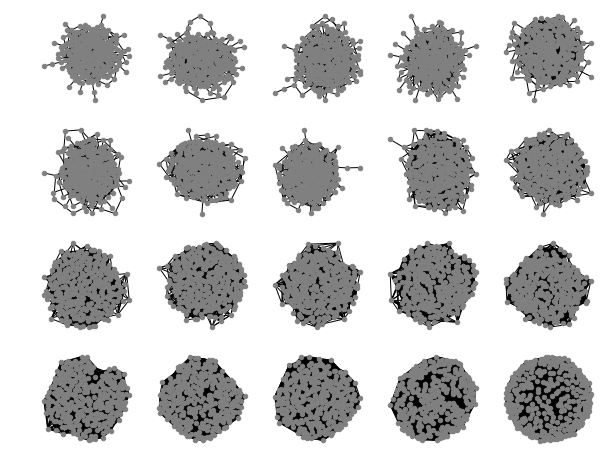

In [40]:
fig,axes=plt.subplots(4,5,figsize=(10,8))
nw=0
i = 0
for ax in tqdm(axes.flat):
    if i < 20:
        pos=nx.kamada_kawai_layout(Ga[i][0])
        nx.draw(Ga[i][0],pos=pos,ax=ax,node_size=20,node_color='grey',with_labels=False)
    i=i+1

plt.savefig(saveFig+'RandomRewired_Sample_Networks.pdf',format='pdf',dpi=300)

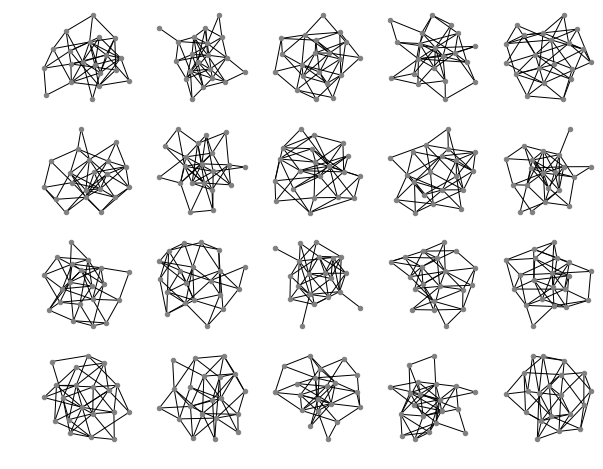

In [52]:
fig,axes=plt.subplots(4,5,figsize=(10,8))
nw=0
i = 0
for ax in tqdm(axes.flat):
    if i < 20:
        pos=nx.kamada_kawai_layout(G1a[i][0])
        nx.draw(G1a[i][0],pos=pos,ax=ax,node_size=20,node_color='grey',with_labels=False)
    i=i+1

plt.savefig(saveFig+'RandomER_Sample_Networks_20Nodes.pdf',format='pdf',dpi=300)

In [23]:
# #save networks separately so Dask can run it more efficiently
# for i in tqdm(range(len(G))):
#     n=G[i]
#     compressed_pickle(n,saveLoc+'Random_Network_VaryingDensity_'+str(i+1)+'.pkl')

In [11]:
# #save networks separately so Dask can run it more efficiently
# for i in tqdm(range(len(G1))):
#     n=G1[i]
#     compressed_pickle(n,saveLoc+'RandomER_Network_VaryingDensity_'+str(i+1)+'.pkl')

In [45]:
result=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN_NLTresults')
resultER=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN_NLTresults')
resultMC=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN_MCresults')
resultMCER=decompress_pickle(saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN_MCresults')

## Run Tasks

In [26]:
onAmp=[0.2,0.5,0.75,1,1.25,1.5,1.75,2,3,5,10]#np.linspace(0,10,201)
voltNames=['0p2','0p5','0p75','1','1p25','1p5','1p75','2','3','5','10']

In [78]:
#NLT
def voltSweep(onAmp,i,j):
    ampName=str(onAmp).replace('.','p')
#     newSaveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Results/'
    newSaveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/'

#     Graph=decompress_pickle(saveLoc+'Random_Network_VaryingDensity_'+str(j+1)+'.pkl')
#     Graph=decompress_pickle(saveLoc+'RandomER_Network_VaryingDensity_'+str(j+1)+'.pkl')
    Graph=decompress_pickle(newSaveLoc+'WattsStrogatz_Network_25deg_'+str(j+1)+'.pkl')
    stimulus=[[],[]]
    dt = 1e-3
    f=0.5
    Time=5

    #Choose Electrode Pattern

    stimulus[0].append((stimulus__(biasType='AC',onAmp=onAmp,TimeVector=np.arange(0,Time,dt),f=f)))
    stimulus[1].append((stimulus__(biasType='Drain',TimeVector=np.arange(0,Time,dt)))) #we don't want this drain to be active during training

    #Initialise Output Variables
    period=[]
    TimeVector=[]
    voltage=[]
    conductance=[]
    switches=[]
    stimulus2 = [item for item in stimulus] #go through each list in the list and find the ith item
    
    results_minMax=runSim(connectivity__(graph=Graph),stimulus=stimulus2, contactMode='farthest', T = Time, dt = dt, onAmp = onAmp, biasType='AC',f=f,junctionMode='tunneling',findFirst=False)
    print('saving')
    activation = findCurrent(results_minMax, 1)
    results={'JunctionConductance':results_minMax.junctionConductance[-1],'JunctionVoltage':results_minMax.junctionVoltage[-1],'Switch':results_minMax.junctionSwitch[-1],'Source':results_minMax.sources[0],'conductance':results_minMax.conductance,'Drain':results_minMax.drains[0],'Signal':results_minMax.stimulus,'CurrentPath':activation}
#     compressed_pickle(results,newSaveLoc+'RandomNWs_NLT_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v'+'.pkl')
    compressed_pickle(results,newSaveLoc+'WattsStrogatz_NLT_Simulation_AvgDeg25'+str(j+1)+'_'+ampName+'v'+'.pkl')

            #     compressed_pickle(results,r'/project/NASN/Alon/'+nwType+'/'+nwType+' Results/'+nwType+'_NLT_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v.pkl')
    results_minMax.frequency=f
    results_minMax.dt=dt
    period=1/f

    if len(Graph) >= 250:
#         nodesList=[50,100,150,200,250,len(ASN300[Max_Min_NWS[j][0]][Max_Min_NWS[j][1]]['G'])]#range(50, len(ws300[i][0])+1,50)
        nodesList=[len(Graph)]#only want all nodes
    elif len(Graph) >= 200 and len(Graph) < 250:
        nodesList=[len(Graph)]
    elif len(Graph) >= 150 and len(Graph) < 200:
        nodesList=[len(Graph)] 
    elif len(Graph) >= 100 and len(Graph) < 150:
        nodesList=[len(Graph)]

    nwSqu =[None]*len(nodesList)

    countK=0
    for k in nodesList: #loop through sets of nodes for regression
        print('Running Regression: ' + str(k) + ' nodes')
        ResultSqu=[]
        ResultSqu = nonLinearTrans(results_minMax,'Square',k, repeats=50) #simulation, type of signal, number of nodes to sample from, number of linear regression repetitions (take avg)
        nwSqu[countK]=ResultSqu['accuracy']
        countK=countK+1
        
    return nwSqu


In [79]:
init=[]
for i in tqdm(range(len(onAmp))): #for each voltage
    for j in range(100): #for each network
        init.append(inputPacker(voltSweep,onAmp[i],i,j))

In [80]:
result=para_run(voltSweep,init,nCPU=10,start_method='fork')

saving
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

Running Regression: 300 nodessaving

Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
savingRunning Regression: 300 nodes

saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.saving

savingRunning Regression: 300 nodes

saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
saving
saving
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodesUnfortunately, only 0 current paths found in simulation time.

Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodessaving

saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodesRunning Regression: 300 nodes

Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
savingsaving

saving
saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodesRunning Regression: 300 nodes

Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
saving
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes

saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.

Running Regression: 300 nodessaving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
saving
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving

Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.


Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.


Running Regression: 300 nodes


saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Unfortunately, only 0 current paths found in simulation time.Running Regression: 300 nodes

savingRunning Regression: 300 nodes

Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
saving
Unfortunately, only 0 current paths found in simulation time.


Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.

Running Regression: 300 nodessaving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.


Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving


Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes
saving
Unfortunately, only 0 current paths found in simulation time.
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodesRunning Regression: 300 nodes

saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes

Running Regression: 300 nodessaving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodessaving

Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving

Running Regression: 300 nodessaving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


savingsaving

Running Regression: 300 nodes
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving

Running Regression: 300 nodessaving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
saving
Running Regression: 300 nodes
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes

saving

Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving

Running Regression: 300 nodes

saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes



savingRunning Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving

Running Regression: 300 nodessaving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving


Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes
saving
Running Regression: 300 nodes


In [81]:
result=np.array(result).reshape(11,100)
# resultsNWN=np.array(resultsNWN).reshape(11,200)
# resultsNWN_MC=np.array(resultsNWN_MC).reshape(11,200)
# resultMCER=np.array(resultMCER).reshape(11,200)
# resultMC=np.array(resultMC).reshape(11,200)

## ANALYSIS

In [165]:
# # plt.xlim(0,0.8)
# fig,axes=plt.subplots(1,4,figsize=(12,3))

# ax=axes[0]
# degrees = [G[60].degree(n) for n in G[60].nodes()]
# ax.hist(degrees,label='Random = Deg Dist')
# ax.set_title('Avg Deg = ' + str(np.round(np.mean(degrees))))

# degrees = [G1[60].degree(n) for n in G1[60].nodes()]
# ax.hist(degrees,label='Random = N and V',color='r',alpha=0.8)

# ax=axes[1]
# degrees = [G[100].degree(n) for n in G[100].nodes()]
# ax.hist(degrees,label='Random = Deg Dist')

# degrees = [G1[100].degree(n) for n in G1[100].nodes()]
# ax.hist(degrees,label='Random = N and V',color='r',alpha=0.8)

# ax.set_title('Avg Deg = ' + str(np.round(np.mean(degrees))))

# ax=axes[2]
# degrees = [G[130].degree(n) for n in G[130].nodes()]
# ax.hist(degrees,label='Random = Deg Dist')

# degrees = [G1[130].degree(n) for n in G1[130].nodes()]
# ax.hist(degrees,label='Random = N and V',color='r',alpha=0.8)

# ax.set_title('Avg Deg = ' + str(np.round(np.mean(degrees))))

# ax=axes[3]
# degrees = [G[150].degree(n) for n in G[150].nodes()]
# ax.hist(degrees,label='Random = Deg Dist')

# degrees = [G1[150].degree(n) for n in G1[150].nodes()]
# ax.hist(degrees,label='Random = N and V',color='r',alpha=0.8)
# ax.set_title('Avg Deg = ' + str(np.round(np.mean(degrees))))


# plt.legend(loc='best', bbox_to_anchor=(1,0.6))
# plt.savefig(saveFig+'Random Networks Degree Distribution - ER vs Rewiring.pdf',format='pdf',dpi=300)

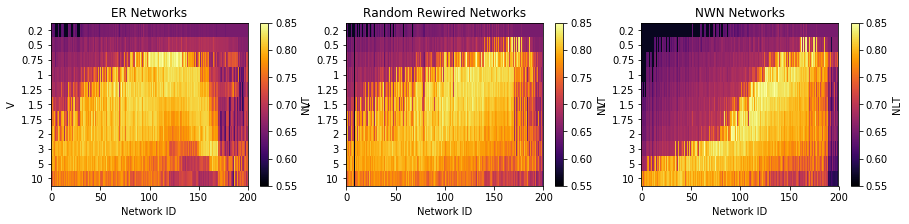

In [17]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.2)
ax=axes[0]
ax.set_title('ER Networks')
a=ax.imshow(resultER,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLT')

ax=axes[1]
ax.set_title('Random Rewired Networks')
b=ax.imshow(result,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLT')

ax=axes[2]
ax.set_title('NWN Networks')
b=ax.imshow(resultsNWN,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLT')

plt.savefig(saveFig+'VaryingDensity_NLT_NWN_vs_ER_vs_RandRewired_VSweep.pdf',format='pdf',dpi=300)

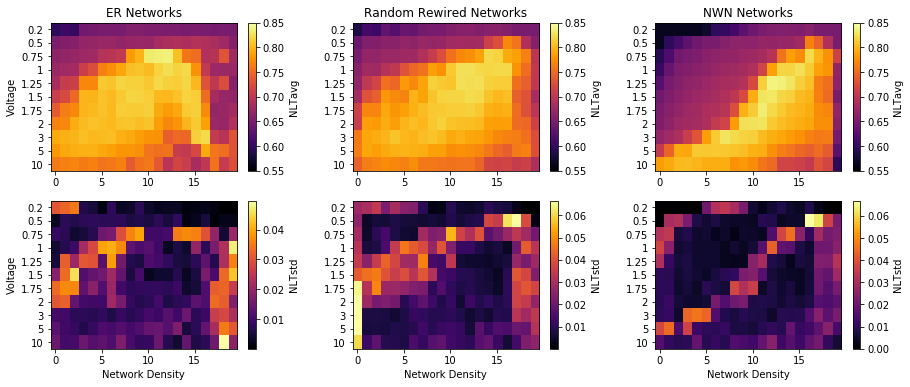

In [18]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,3,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)
ax=axes[0][0]
ax.set_title('ER Networks')
a=ax.imshow(np.mean(np.array(resultER).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto',vmin=0.55,vmax=0.85)
plt.colorbar(a,ax=ax,label='NLTavg')
ax.set_ylabel('Voltage')

# ax.set_xticks(np.arange(0,len(BetaVals)))
# ax.set_xticklabels(np.around(BetaVals,2),rotation=45)

ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)

ax=axes[1][0]
a1=ax.imshow(np.std(np.array(resultER).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_ylabel('Voltage')
ax.set_xlabel('Network Density')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
# ax.set_xticks(np.arange(0,len(BetaVals)))
# ax.set_xticklabels(np.around(BetaVals,2),rotation=45)
plt.colorbar(a1,ax=ax,label='NLTstd')

ax=axes[0][1]
ax.set_title('Random Rewired Networks')
b=ax.imshow(np.mean(np.array(result).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto',vmin=0.55,vmax=0.85)
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='NLTavg')

ax=axes[1][1]
b1=ax.imshow(np.std(np.array(result).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_xlabel('Network Density')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b1,ax=ax,label='NLTstd')

ax=axes[0][2]
ax.set_title('NWN Networks')
b=ax.imshow(np.mean(np.array(resultsNWN).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto',vmin=0.55,vmax=0.85)
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='NLTavg')

ax=axes[1][2]
b1=ax.imshow(np.std(np.array(resultsNWN).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_xlabel('Network Density')
ax.set_xticklabels()
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b1,ax=ax,label='NLTstd')

# plt.savefig(saveFig+'VaryingDensity_AvgNLT_NWN_vs_WattsStrogatz_VSweep.pdf',format='pdf',dpi=300)
plt.savefig(saveFig+'VaryingDensity_AvgNLT_NWN_vs_ER_vs_RandRewired_VSweep.pdf',format='pdf',dpi=300)

In [82]:
# compressed_pickle(result,saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN_NLTresults')
# compressed_pickle(result,saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN_NLTresults')
compressed_pickle(result,saveLoc+'WattsStrogatz_Betasweep_NLTresults_avgDeg25')

In [173]:
print('Max Avg Random ER NLT:' + str(np.max(np.mean(np.array(result).reshape(11,10,10),axis=2))))
print('Max Avg NWN NLT:' + str(np.max(np.mean(np.array(resultsNWN).reshape(11,20,10),axis=2))))

Max Avg Random ER NLT:0.8301338670975712
Max Avg NWN NLT:0.838458774372351


## MC 

In [83]:
def get_MC_Voltsweep(i,j,amp = 2, dt = 0.01, dur = 1, n_outs = 100, init_state = None, return_sim = False):
    ampName=str(amp).replace('.','p')
#     newSaveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Results/'
    newSaveLoc='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/'

    Graph=decompress_pickle(saveLoc+'WattsStrogatz_Network_25deg_'+str(j+1)+'.pkl')

#     Graph=decompress_pickle(saveLoc+'RandomER_Network_VaryingDensity_'+str(j+1)+'.pkl')

    signal = signal_expand(np.random.random(1000)*2*amp-amp, dur)
    results_minMax = runSim(connectivity__(graph=Graph), T = 10, dt = dt,
                start_state =  init_state,
                biasType = 'Custom', customSignal = signal, 
                junctionMode = 'tunneling', 
                contactMode = 'farthest',
                findFirst=False, disable_tqdm=True)
    
#     activation = findCurrent(results_minMax, 1)
    results={'JunctionConductance':results_minMax.junctionConductance[-1],'JunctionVoltage':results_minMax.junctionVoltage[-1],'Switch':results_minMax.junctionSwitch[-1],'Source':results_minMax.sources[0],'conductance':results_minMax.conductance,'Drain':results_minMax.drains[0],'Signal':results_minMax.stimulus}#,'CurrentPath':activation}
#     compressed_pickle(results,newSaveLoc+'RandomERNWs_MC_Simulation_'+'Density_Network_'+str(j+1)+'_'+ampName+'v'+'.pkl')
    compressed_pickle(results,newSaveLoc+'WattsStrogatz_MC_Simulation_AvgDeg25'+str(j+1)+'_'+ampName+'v'+'.pkl')
    n_outs=len(Graph)
    mcRAND = [MC_k(results_minMax, k, n_outs = n_outs) for k in range(dur, len(Graph)*dur, dur)]
    
    if return_sim:
        return np.sum(mcRAND), results_minMax
    else:
        return np.sum(mcRAND)

In [84]:
initMC=[]
for i in range(len(onAmp)):
        for j in range(100): #for each network
            initMC.append(inputPacker(get_MC_Voltsweep,i,j,amp=onAmp[i]))

In [85]:
resultMC=[]
for i in tqdm(range(10)):
    resultMC.append(para_run(get_MC_Voltsweep,initMC,nCPU=10,start_method='fork'))

In [86]:
resultMC=np.mean(resultMC,axis=0)

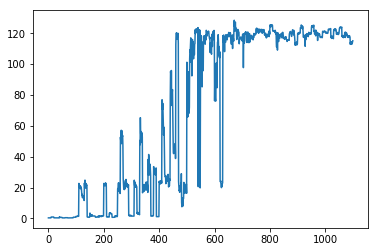

In [134]:
plt.plot(resultMC)

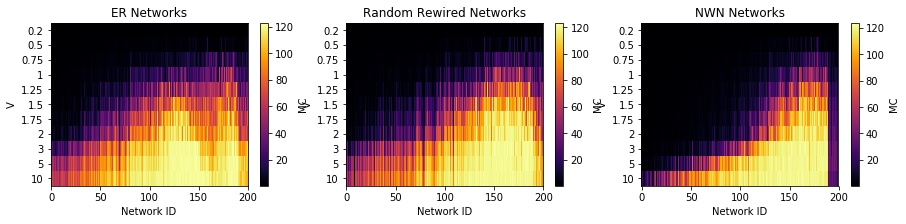

In [21]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.2)
ax=axes[0]
ax.set_title('ER Networks')
a=ax.imshow(resultMCER,aspect='auto',cmap=plt.cm.inferno)#,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='MC')

ax=axes[1]
ax.set_title('Random Rewired Networks')
b=ax.imshow(resultMC,aspect='auto',cmap=plt.cm.inferno)#,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MC')

ax=axes[2]
ax.set_title('NWN Networks')
b=ax.imshow(resultsNWN_MC,aspect='auto',cmap=plt.cm.inferno)#,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MC')

# plt.savefig(saveFig+'VaryingDensity_MC_NWN_vs_WattsStrogatz_VSweep.pdf',format='pdf',dpi=300)
plt.savefig(saveFig+'VaryingDensity_MC_NWN_vs_ER_vs_RandRewired_VSweep.pdf',format='pdf',dpi=300)

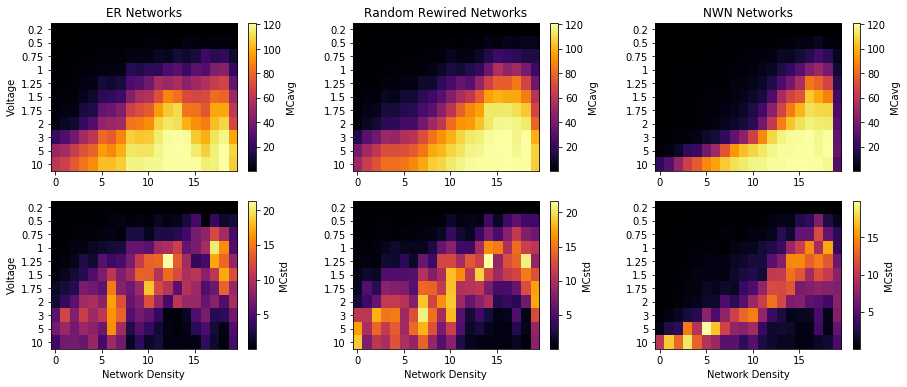

In [22]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(2,3,figsize=(15,6))
fig.subplots_adjust(wspace=0.3)
ax=axes[0][0]
ax.set_title('ER Networks')
a=ax.imshow(np.mean(np.array(resultMCER).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')#,vmin=0.55,vmax=0.85)
plt.colorbar(a,ax=ax,label='MCavg')
ax.set_ylabel('Voltage')

# ax.set_xticks(np.arange(0,len(BetaVals)))
# ax.set_xticklabels(np.around(BetaVals,2),rotation=45)

ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)

ax=axes[1][0]
a1=ax.imshow(np.std(np.array(resultMCER).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_ylabel('Voltage')
ax.set_xlabel('Network Density')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
# ax.set_xticks(np.arange(0,len(BetaVals)))
# ax.set_xticklabels(np.around(BetaVals,2),rotation=45)
plt.colorbar(a1,ax=ax,label='MCstd')

ax=axes[0][1]
ax.set_title('Random Rewired Networks')
b=ax.imshow(np.mean(np.array(resultMC).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')#,vmin=0.55,vmax=0.85)
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)

plt.colorbar(b,ax=ax,label='MCavg')

ax=axes[1][1]
b1=ax.imshow(np.std(np.array(resultMC).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_xlabel('Network Density')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b1,ax=ax,label='MCstd')

ax=axes[0][2]
ax.set_title('NWN Networks')
b=ax.imshow(np.mean(np.array(resultsNWN_MC).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')#,vmin=0.55,vmax=0.85)
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b,ax=ax,label='MCavg')

ax=axes[1][2]
b1=ax.imshow(np.std(np.array(resultsNWN_MC).reshape(11,20,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
ax.set_xlabel('Network Density')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
plt.colorbar(b1,ax=ax,label='MCstd')

# plt.savefig(saveFig+'VaryingDensity_AvgMC_NWN_vs_WattsStrogatz_VSweep.pdf',format='pdf',dpi=300)
plt.savefig(saveFig+'VaryingDensity_AvgMC_NWN_vs_ER_vs_RandRewired_VSweep.pdf',format='pdf',dpi=300)

In [139]:
print('Max Avg Random ER MC:' + str(np.max(np.mean(np.array(resultMC).reshape(11,20,10),axis=2))))
print('Max Avg NWN MC:' + str(np.max(np.mean(np.array(resultsNWN_MC).reshape(11,20,10),axis=2))))

ValueError: cannot reshape array of size 1100 into shape (11,20,10)

In [87]:
# compressed_pickle(resultMC,saveLoc+'RandomNW_VaryingDensity_SameDegreeDistAsNWN_MCresults')
# compressed_pickle(resultMC,saveLoc+'RandomNW_VaryingDensity_SameNodesandEdgesAsNWN_MCresults')
compressed_pickle(resultMC,saveLoc+'WattsStrogatz_Betasweep_MCresults_avgDeg25')

### Network Level Analysis

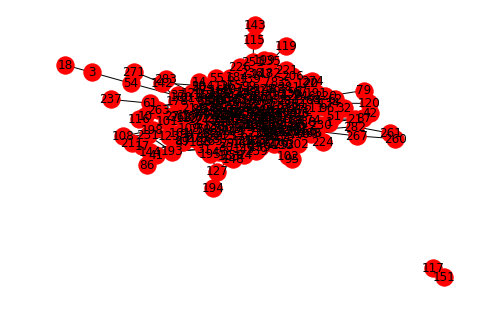

In [26]:
nx.draw(G[i],with_labels=True)

### Node Level Analysis

In [87]:
GNWN=[]
for i in range(len(networks)):
    GNWN.append(nx.from_numpy_array(networks[i]['adj_matrix']))

In [88]:
SPL=[]
SPLer=[]
SPLnwn=[]
for i in tqdm(range(len(G))):
    electrodes=getFarthestPairing(nx.adjacency_matrix(max(connected_component_subgraphs(G[i]),key=len)).todense())
    electrodesER=getFarthestPairing(nx.adjacency_matrix(max(connected_component_subgraphs(G1[i]),key=len)).todense())
    electrodesNWN=getFarthestPairing(networks[i]['adj_matrix'])
    SPL.append(nx.shortest_path_length(G[i],electrodes[0],electrodes[1]))
    SPLer.append(nx.shortest_path_length(G1[i],electrodesER[0],electrodesER[1]))
    SPLnwn.append(nx.shortest_path_length(GNWN[i],electrodesNWN[0],electrodesNWN[1]))

In [134]:
resultsNWN=np.array(resultsNWN).reshape(11,20,10)
resultMC=np.array(resultMC).reshape(11,20,10)
resultMCER=np.array(resultMCER).reshape(11,20,10)
resultsNWN_MC=np.array(resultsNWN_MC).reshape(11,20,10)
result=np.array(result).reshape(11,20,10)
resultER=np.array(resultER).reshape(11,20,10)
SPL=np.array(SPL).reshape(20,10)
SPLer=np.array(SPLer).reshape(20,10)
SPLnwn=np.array(SPLnwn).reshape(20,10)

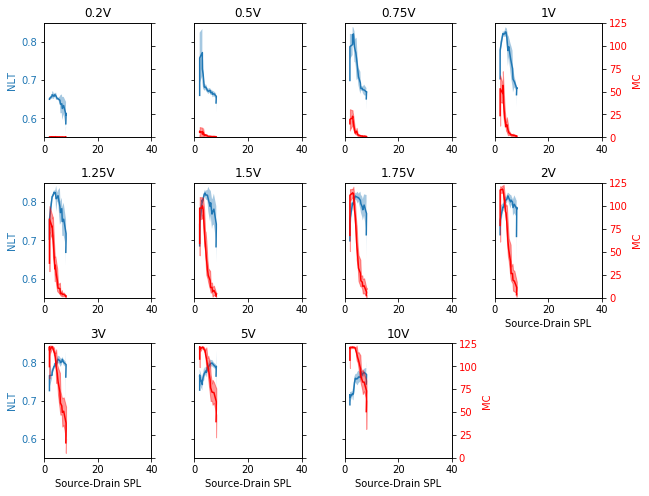

In [179]:
fig,axes=plt.subplots(3,4,figsize=(10,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
i=0
for ax in axes.flat:
    if i <11:
        ax.set_title(str(onAmp[i])+'V')
        ax.plot(np.mean(SPL,axis=1),np.mean(result[i],axis=1))
        yErr=np.std(result[i],axis=1)
        ax.fill_between(np.mean(SPL,axis=1),np.mean(result[i],axis=1)-yErr,np.mean(result[i],axis=1)+yErr,alpha=0.4)
        if i==7 or i == 8 or i ==9 or i ==10:
            ax.set_xlabel('Source-Drain SPL')
#         ax.set_ylabel('NLT')
#         ax.yaxis.label.set_color('tab:blue')
#         ax.tick_params(axis='y', colors='tab:blue')
        ax.set_ylim([0.55,0.85])
        ax.set_xlim([0,40])
        if i == 0 or i == 4 or i == 8:
            ax.set_ylabel('NLT',color='tab:blue')
            ax.tick_params(axis='y',labelcolor='tab:blue')
        else:
            ax.set_yticklabels([])
        
        ax2=ax.twinx()
        ax2.plot(np.mean(SPL,axis=1),np.mean(resultMC[i],axis=1),c='r')
        yErr=np.std(resultMC[i],axis=1)
        ax2.fill_between(np.mean(SPL,axis=1),np.mean(resultMC[i],axis=1)-yErr,np.mean(resultMC[i],axis=1)+yErr,color='r',alpha=0.4)
        ax2.set_xlabel('Source-SPLer SPL')
#         ax2.set_ylabel('MC')
        if i == 3 or i == 7 or i == 10:
            ax2.set_ylabel('MC',color='r')
            ax2.tick_params(axis='y',labelcolor='red')
        else:
            ax2.set_yticklabels([])
        ax2.set_ylim([0,125])
        ax2.set_xlim([0,40])
    else:
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    i = i+1

    
    
plt.savefig(saveFig+'SPL vs NLT & MC - VSweep 300ER_rewired Varying Density.pdf',format='pdf',dpi=300)

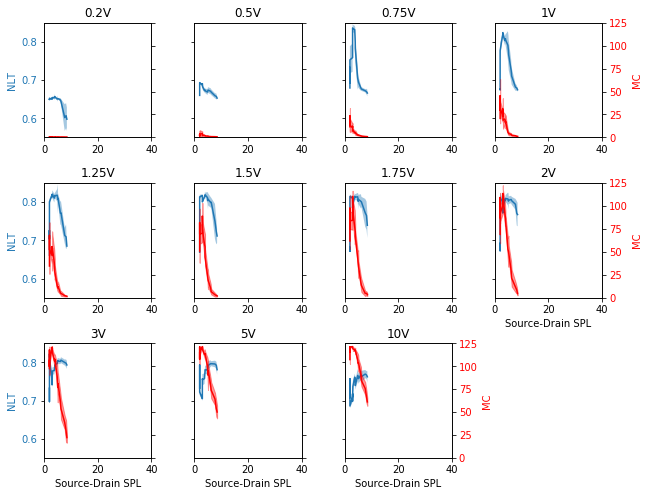

In [177]:
fig,axes=plt.subplots(3,4,figsize=(10,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
i=0
for ax in axes.flat:
    if i <11:
        ax.set_title(str(onAmp[i])+'V')
        ax.plot(np.mean(SPLer,axis=1),np.mean(resultER[i],axis=1))
        yErr=np.std(resultER[i],axis=1)
        ax.fill_between(np.mean(SPLer,axis=1),np.mean(resultER[i],axis=1)-yErr,np.mean(resultER[i],axis=1)+yErr,alpha=0.4)
        if i==7 or i == 8 or i ==9 or i ==10:
            ax.set_xlabel('Source-Drain SPL')
#         ax.set_ylabel('NLT')
#         ax.yaxis.label.set_color('tab:blue')
#         ax.tick_params(axis='y', colors='tab:blue')
        ax.set_ylim([0.55,0.85])
        ax.set_xlim([0,40])
        if i == 0 or i == 4 or i == 8:
            ax.set_ylabel('NLT',color='tab:blue')
            ax.tick_params(axis='y',labelcolor='tab:blue')
        else:
            ax.set_yticklabels([])
        
        ax2=ax.twinx()
        ax2.plot(np.mean(SPLer,axis=1),np.mean(resultMCER[i],axis=1),c='r')
        yErr=np.std(resultMCER[i],axis=1)
        ax2.fill_between(np.mean(SPLer,axis=1),np.mean(resultMCER[i],axis=1)-yErr,np.mean(resultMCER[i],axis=1)+yErr,color='r',alpha=0.4)
        ax2.set_xlabel('Source-SPLer SPL')
#         ax2.set_ylabel('MC')
        if i == 3 or i == 7 or i == 10:
            ax2.set_ylabel('MC',color='r')
            ax2.tick_params(axis='y',labelcolor='red')
        else:
            ax2.set_yticklabels([])
        ax2.set_ylim([0,125])
        ax2.set_xlim([0,40])
    else:
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    i = i+1

    
    
plt.savefig(saveFig+'SPL vs NLT & MC - VSweep 300ER Varying Density.pdf',format='pdf',dpi=300)

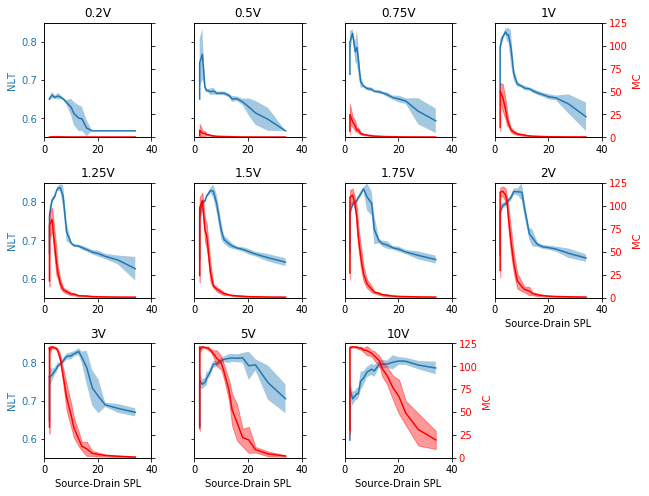

In [175]:
fig,axes=plt.subplots(3,4,figsize=(10,8))
fig.subplots_adjust(hspace=0.4)
fig.subplots_adjust(wspace=0.4)
i=0
for ax in axes.flat:
    if i <11:
        ax.set_title(str(onAmp[i])+'V')
        ax.plot(np.mean(SPLnwn,axis=1),np.mean(resultsNWN[i],axis=1))
        yErr=np.std(resultsNWN[i],axis=1)
        ax.fill_between(np.mean(SPLnwn,axis=1),np.mean(resultsNWN[i],axis=1)-yErr,np.mean(resultsNWN[i],axis=1)+yErr,alpha=0.4)
        if i==7 or i == 8 or i ==9 or i ==10:
            ax.set_xlabel('Source-Drain SPL')
#         ax.set_ylabel('NLT')
#         ax.yaxis.label.set_color('tab:blue')
#         ax.tick_params(axis='y', colors='tab:blue')
        ax.set_ylim([0.55,0.85])
        ax.set_xlim([0,40])
        if i == 0 or i == 4 or i == 8:
            ax.set_ylabel('NLT',color='tab:blue')
            ax.tick_params(axis='y',labelcolor='tab:blue')
        else:
            ax.set_yticklabels([])
        
        ax2=ax.twinx()
        ax2.plot(np.mean(SPLnwn,axis=1),np.mean(resultsNWN_MC[i],axis=1),c='r')
        yErr=np.std(resultsNWN_MC[i],axis=1)
        ax2.fill_between(np.mean(SPLnwn,axis=1),np.mean(resultsNWN_MC[i],axis=1)-yErr,np.mean(resultsNWN_MC[i],axis=1)+yErr,color='r',alpha=0.4)
        ax2.set_xlabel('Source-Drain SPL')
#         ax2.set_ylabel('MC')
        if i == 3 or i == 7 or i == 10:
            ax2.set_ylabel('MC',color='r')
            ax2.tick_params(axis='y',labelcolor='red')
        else:
            ax2.set_yticklabels([])
        ax2.set_ylim([0,125])
        ax2.set_xlim([0,40])
    else:
        ax.set_frame_on(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
    i = i+1

    
    
plt.savefig(saveFig+'SPL vs NLT & MC - VSweep 300NWN Varying Density.pdf',format='pdf',dpi=300)

### Small-World (Watts-Strogatz)

In [88]:
result=decompress_pickle(saveLoc+'WattsStrogatz_Betasweep_NLTresults_avgDeg25')
resultMC=decompress_pickle(saveLoc+'WattsStrogatz_Betasweep_MCresults_avgDeg25')

In [115]:
resultMC=np.array(resultMC).reshape(11,100)

In [89]:
BetaVals=np.linspace(0.1,1,10)
numNetworks=10
seed=[None]*numNetworks
for j in range(numNetworks):
    seed[j]=(np.random.randint(10000))

In [189]:
BetaVals

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [21]:
np.mean(np.array([i for i in nx.from_numpy_array(networks[50]['adj_matrix']).degree()])[:,1])

NameError: name 'networks' is not defined

In [48]:
BetaGraphs=[[None]*numNetworks for j in range(len(BetaVals))]
for i in tqdm(range(len(BetaVals))): #for each ws beta
    temp=[]
    for j in tqdm(range(numNetworks)): #for each network
        OG=nx.from_numpy_array(networks[120]['adj_matrix']) #avg degree network 
        numNodes=OG.number_of_nodes()
#         k=np.round(np.mean(list(k.values()))) #rounded k nearest neighbours
        k=np.round(np.mean(np.array([i for i in OG.degree()])[:,1])) #rounded avg degree
        k=np.int(k)
        temp=(nx.watts_strogatz_graph(numNodes,k,p=BetaVals[i],seed=seed[j]))
        BetaGraphs[i][j]=(max(connected_component_subgraphs(temp), key=len))
        while BetaGraphs[i][j].number_of_nodes() <numNodes:
            temp=(nx.watts_strogatz_graph(numNodes,k,p=BetaVals[i],seed=np.random.randint(10000)))
            BetaGraphs[i][j]=(max(connected_component_subgraphs(temp), key=len))

    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WS_25_BetaGraphs_' +str(i)
    print('Saving WS')
    compressed_pickle(BetaGraphs[i],name)
    print('Saved')

Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


Saving WS
Saved


In [90]:
BetaGraphs=[[None]*numNetworks for j in range(len(BetaVals))]
for i in tqdm(range(len(BetaVals))): #for each ws beta
    name='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WS_25_BetaGraphs_' +str(i)
    BetaGraphs[i]=decompress_pickle(name)

In [94]:
GWS=[]
for i in range(len(BetaGraphs)):
    for j in range(len(BetaGraphs[i])):
        GWS.append(BetaGraphs[i][j])

In [95]:
adjmatWS=[]
for i in range(len(GWS)):
    adjmatWS.append(np.array(nx.adjacency_matrix(GWS[i]).todense()))

In [96]:
adjMatsWS={"AdjMat":[]}
for i in range(len(GWS)):
    adjMatsWS['AdjMat'].append(np.double(adjmatWS[i]))
savemat('/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WattsStrogatz_25deg_NWNMC_allVolts.mat',adjMatsWS)

In [68]:
#save networks separately so Dask can run it more efficiently
for i in tqdm(range(len(GWS))):
    n=GWS[i]
    compressed_pickle(n,'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WattsStrogatz_Network_25deg_'+str(i+1)+'.pkl')

In [19]:
temp=loadmat(r'/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/WattsStrogatz_25deg_NWNMC_allVolts_smallworld')
smallworld=temp['smallworld'][0]

In [20]:
smallworlds=np.mean(np.array(smallworld.reshape(10,10)),axis=1)

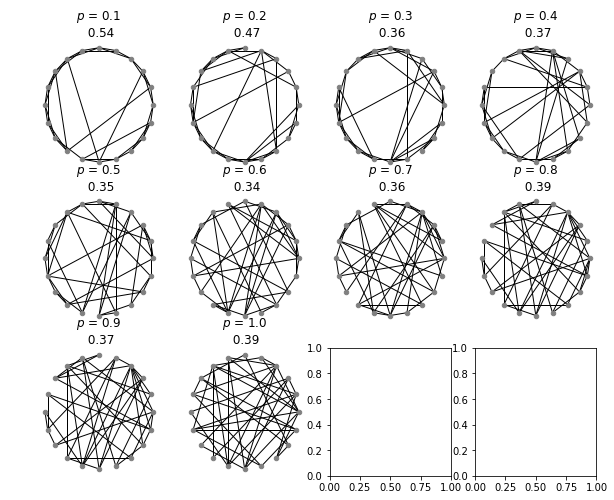

In [186]:
fig,axes=plt.subplots(3,4,figsize=(10,8))
nw=0
i = 0
for ax in tqdm(axes.flat):
    if i < 10:
        pos=nx.circular_layout(BetaGraphs[i][nw])
        nx.draw(BetaGraphs[i][nw],pos=pos,ax=ax,node_size=20,node_color='grey',with_labels=False)
        ax.set_title(r'$p$ = '+str(np.around(BetaVals[i],2))+'\n '+str(np.around(smallworlds[i],2)))
    i=i+1

plt.savefig(saveFig+'WattsStrogatz_SampleNetworks_20Nodes_avgDeg25.pdf',format='pdf',dpi=300)

### Analysis

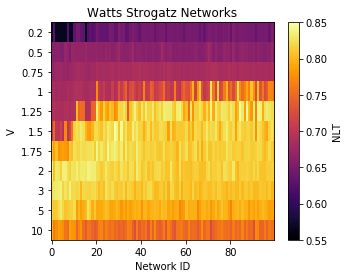

In [49]:
fig,axes=plt.subplots(1,1,figsize=(5,4))
fig.subplots_adjust(wspace=0.2)
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(result,aspect='auto',cmap=plt.cm.inferno,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='NLT')

plt.savefig(saveFig+'WattsStrogatz_VSweep_NLT_avgDeg7.pdf',format='pdf',dpi=300)

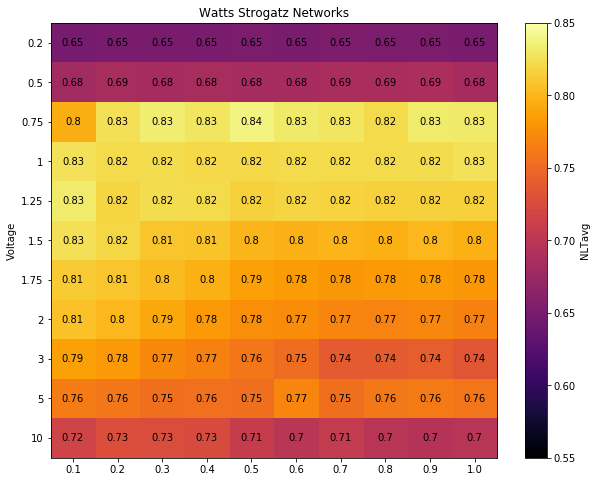

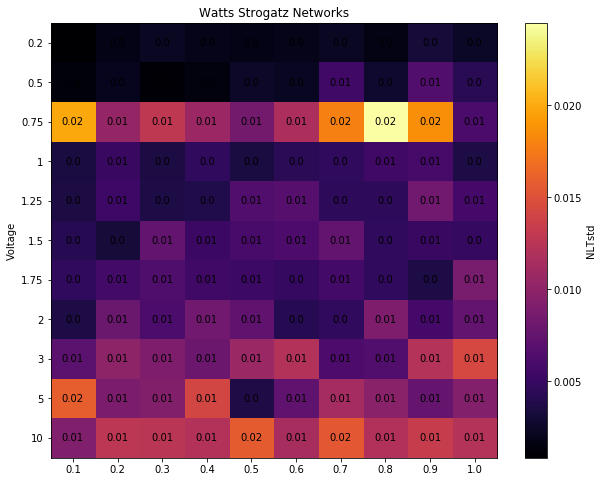

In [97]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,1,figsize=(10,8))
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(np.mean(np.array(result).reshape(11,10,10),axis=2),cmap=plt.cm.inferno,aspect='auto',vmin=0.55,vmax=0.85)
plt.colorbar(a,ax=ax,label='NLTavg')
ax.set_ylabel('Voltage')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

for (j,i),label in np.ndenumerate(np.mean(np.array(result).reshape(11,10,10),axis=2)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
plt.savefig(saveFig+'WattsStrogatz_VSweep_AvgNLT_text_avgDeg25.pdf',format='pdf',dpi=300)

#STD 
fig,axes=plt.subplots(1,1,figsize=(10,8))
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(np.std(np.array(result).reshape(11,10,10),axis=2),cmap=plt.cm.inferno,aspect='auto')
plt.colorbar(a,ax=ax,label='NLTstd')
ax.set_ylabel('Voltage')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

for (j,i),label in np.ndenumerate(np.std(np.array(result).reshape(11,10,10),axis=2)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
plt.savefig(saveFig+'WattsStrogatz_VSweep_StdNLT_text_avgDeg25.pdf',format='pdf',dpi=300)


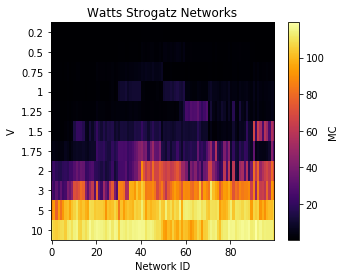

In [52]:
fig,axes=plt.subplots(1,1,figsize=(5,4))
fig.subplots_adjust(wspace=0.2)
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(np.array(resultMC).reshape(11,100),aspect='auto',cmap=plt.cm.inferno)#,vmin=0.55,vmax=0.85)
ax.set_xlabel('Network ID')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
plt.colorbar(a,ax=ax,label='MC')

plt.savefig(saveFig+'WattsStrogatz_VSweep_MC_avgDeg25.pdf',format='pdf',dpi=300)

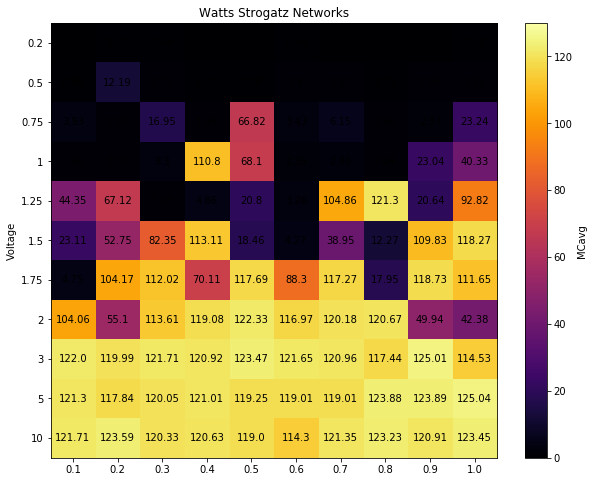

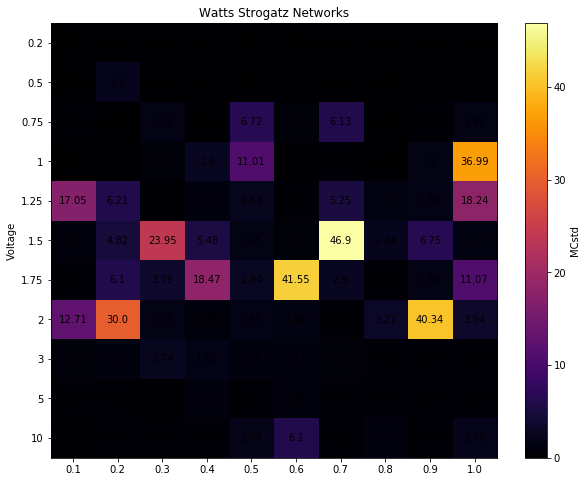

In [98]:
plt.rcParams['pdf.fonttype'] = 42

fig,axes=plt.subplots(1,1,figsize=(10,8))
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(np.mean(np.array(resultMC).reshape(11,10,10),axis=2),cmap=plt.cm.inferno,aspect='auto',vmin=0,vmax=130)
plt.colorbar(a,ax=ax,label='MCavg')
ax.set_ylabel('Voltage')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

for (j,i),label in np.ndenumerate(np.mean(np.array(resultMC).reshape(11,10,10),axis=2)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')

plt.savefig(saveFig+'WattsStrogatz_VSweep_AvgMC_text_avgDeg25.pdf',format='pdf',dpi=300)

#STD 
fig,axes=plt.subplots(1,1,figsize=(10,8))
ax=axes
ax.set_title('Watts Strogatz Networks')
a=ax.imshow(np.std(np.array(resultMC).reshape(11,10,10),axis=2),cmap=plt.cm.inferno,aspect='auto')#,vmin=0,vmax=1)
plt.colorbar(a,ax=ax,label='MCstd')
ax.set_ylabel('Voltage')
ax.set_yticks(np.arange(0,len(onAmp)))
ax.set_yticklabels(onAmp)
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

for (j,i),label in np.ndenumerate(np.std(np.array(resultMC).reshape(11,10,10),axis=2)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='k')
    
plt.savefig(saveFig+'WattsStrogatz_VSweep_StdMC_text_avgDeg25.pdf',format='pdf',dpi=300)

In [99]:
dfmeanNLT=np.mean(np.array(result).reshape(11,10,10),axis=2)
dfmeanMC=np.mean(np.array(resultMC).reshape(11,10,10),axis=2)

In [ ]:
#Set indexes of best and worst networks for each voltage and density
numNWs=1
maxNLT=[[] for i in range(len(result))];maxMC=[[] for i in range(len(resultMC))]
minNLT=[[] for i in range(len(result))];minMC=[[] for i in range(len(resultMC))]

idxMaxNLT=[[] for i in range(len(result))];idxMaxMC=[[] for i in range(len(resultMC))]
idxMinNLT=[[] for i in range(len(result))];idxMinMC=[[] for i in range(len(resultMC))]

for i in range(len(newResults)):
    for j in range(len(newResults[i])):
        maxNLT[i].append(np.sort(result[i][j])[-numNWs:])
        maxMC[i].append(np.sort(resultMC[i][j])[-numNWs:])
        idxMaxNLT[i].append(np.argsort(result[i][j])[-numNWs:])
        idxMaxMC[i].append(np.argsort(resultMC[i][j])[-numNWs:])
        
        minNLT[i].append(np.sort(result[i][j])[:numNWs])
        minMC[i].append(np.sort(resultMC[i][j])[:numNWs])
        idxMinNLT[i].append(np.argsort(result[i][j])[:numNWs])
        idxMinMC[i].append(np.argsort(resultMC[i][j])[:numNWs])

### Multi-Tasking Peformance

In [ ]:
maxMCval=np.max(dfmeanMC)
maxNLTval=np.max(dfmeanNLT)

minMCval=np.min(dfmeanMC)
minNLTval=np.min(dfmeanNLT)

In [101]:
#Calculate the difference between each network and the max possible performance
dfMC_diffMax=[]
for i in range(11):
    dfMC_diffMax.append(maxMCval-dfmeanMC[i])
    
dfNLT_diffMax=[]
for i in range(11):
    dfNLT_diffMax.append(maxNLTval-dfmeanNLT[i])


In [102]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

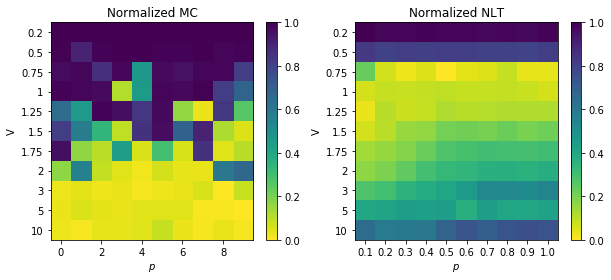

In [103]:
# a=normalize(pd.DataFrame(np.array(dfNLT_sumDiff)))
# b=normalize(pd.DataFrame(np.array(dfMC_sumDiff)))
a=normalize(np.array(dfNLT_diffMax))
b=normalize(np.array(dfMC_diffMax))

fig,axes=plt.subplots(1,2,figsize=(10,4))
ax=axes[0]
a1=ax.imshow(b,aspect='auto',cmap=plt.cm.viridis_r)
plt.colorbar(a1,ax=ax)
ax.set_title('Normalized MC')
ax.set_xlabel('$p$')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
ax=axes[1]
b1=ax.imshow(a,aspect='auto',cmap=plt.cm.viridis_r)
plt.colorbar(b1,ax=ax)
ax.set_title('Normalized NLT')
ax.set_xlabel('$p$')
ax.set_ylabel('V')
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(saveFig+'WattsStrogatz_VSweep_Normalized_avgDeg25 NLT and MC Max Diff.pdf',format='pdf',dpi=300)


In [104]:
normalizedDifferenceNLT_MC=(a-b)/(a+b)
normalizedDifferenceMC_NLT=(b-a)/(b+a)

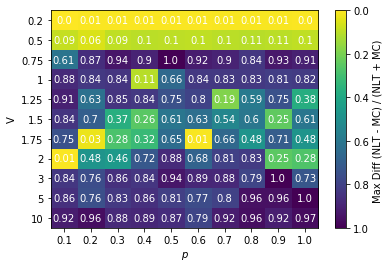

In [105]:
import matplotlib.colors
fig,ax=plt.subplots(1)
plt.imshow(np.abs(normalizedDifferenceNLT_MC),aspect='auto',cmap=plt.cm.viridis_r)
cb=plt.colorbar(label='Max Diff (NLT - MC) / (NLT + MC) ',ax=ax)
cb.ax.invert_yaxis() 
cb.set_ticks(np.arange(0,1.1,step=0.2))
cb.set_ticklabels(np.around(np.arange(0,1.1,0.2),2))


ax=plt.gca()
# ax.set_xticks(np.arange(0,7))
# ax.set_xticklabels(['Integrated','1','2','3','4','Segregated','Separated'],rotation=45)
ax.set_yticks(np.arange(0,11))
ax.set_yticklabels(onAmp)
ax.set_xlabel('$p$')
ax.set_ylabel('V')
for (j,i),label in np.ndenumerate(np.abs(normalizedDifferenceNLT_MC)):
    ax.text(i,j,np.around(label,2),ha='center',va='center',color='white')
    
ax.set_xticks(np.arange(0,len(BetaVals)))
ax.set_xticklabels(np.around(BetaVals,2))

plt.rcParams['pdf.fonttype'] = 42
plt.savefig(saveFig+'WattsStrogatz_VSweep_Normalized_avgDeg25 NLT + MC Max Diff.pdf',format='pdf',dpi=300)


### Conductance

In [106]:
#folder='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/Random Results/'
folder='/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/BetaSweep/'

In [107]:
WS_NLT_sims=[[] for i in range(len(result))]
WS_MC_sims=[[] for i in range(len(result))]
j=0
for volt in tqdm(range(len(result))):
    for i in range(len(result[volt])):
        name=folder+'WattsStrogatz_NLT_Simulation_AvgDeg25'+str(i+1)+'_'+voltNames[volt]+'v.pkl'
        name2=folder+'WattsStrogatz_MC_Simulation_AvgDeg25'+str(i+1)+'_'+voltNames[volt]+'v.pkl'
        WS_NLT_sims[j].append(decompress_pickle(name))
        WS_MC_sims[j].append(decompress_pickle(name2))
    j=j+1
    
#Load Dictionary of Graph Theory Measures:
# [subgraphsNLT,subgraphsMC]=decompress_pickle('/import/silo2/aloe8475/Documents/CODE/Data/Functional Connectivity/DensityNWNs/VaryingDensityNWN_subgraphs_data')

In [108]:
#Subgraph AdjMat

#Threshold by conductance - when tunnelling becomes appreciable (offResistance * 10)

def getOnGraph(sims,network,edgeList,numWires):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    adjMat[edgeList[:,0], edgeList[:,1]] = (1/sims['JunctionResistance'])>1e-06#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    adjMat[edgeList[:,1], edgeList[:,0]] = (1/sims['JunctionResistance'])>1e-06#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    onGraph = nx.from_numpy_array(adjMat)
    onGraph=nx.DiGraph.to_undirected(onGraph)
    
    return onGraph

def getWeightedGraph(sims,network,edgeList,numWires):#, this_TimeStamp = 0):
#     edgeList = network['edge_list']
    adjMat = np.zeros((numWires, numWires))
#     set_trace()
    adjMat[edgeList[:,0], edgeList[:,1]] = sims['JunctionConductance']#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    adjMat[edgeList[:,1], edgeList[:,0]] = sims['JunctionConductance']#network.junctionSwitch[this_TimeStamp,:] #CHANGE THIS TO CONDUCTANCE THRESHOLD?
    WeightedGraph = nx.from_numpy_array(adjMat)
    WeightedGraph=nx.DiGraph.to_undirected(WeightedGraph)
    
    return WeightedGraph

In [149]:
result=np.array(result).reshape(11,100)
resultMC=np.array(resultMC).reshape(11,100)

In [150]:
subgraph_idx_NLT=[[] for i in range(len(result))]
subgraph_NLT=[[] for i in range(len(result))]
current=[[] for i in range(len(result))]
sources=[[] for i in range(len(result))]
drains=[[] for i in range(len(result))]
weightedSubGraph_NLT=[[] for i in range(len(result))]
for k in range(len(result)):
    for i in tqdm(range(len(GWS))):
        sim=WS_NLT_sims[k][i]
        graph=GWS[i]
        network=np.array(nx.adjacency_matrix(graph).todense())
    
        sources[k].append(sim['Source'])
        drains[k].append(sim['Drain'])
        OGgraph=graph
        pos=nx.kamada_kawai_layout(OGgraph)
        numWires=GWS[i].number_of_nodes()
        sim['JunctionResistance']=1/sim['JunctionConductance']
        edgeList=np.array(list(GWS[i].edges()))
        subGraph=getOnGraph(sim,network,edgeList,numWires)
        weightedSubGraph_NLT[k].append(getWeightedGraph(sim,network,edgeList,numWires))
        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        currMat = np.zeros((numWires, numWires))
        currMat[edgeList[:,0], edgeList[:,1]] = sim['JunctionVoltage']/sim['JunctionResistance'] #-1,:
        current[k].append(nx.from_numpy_matrix(currMat)) #save current

        currMat = currMat + currMat.T
        currGraph = nx.from_numpy_array(currMat)
#         subGraph = getOnGraph(sim,network)#this_TimeStamp=i)

        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        # ASK RUOMIN ABOUT BELOW PART - I Don't think it's necessary, as it's taking only 
        # nodes that have current flowing through them. We want ALL sections of the network with a certain
        # conductance (which we get in subGraph)
        
        max_ind = np.argmax([len(j) for j in nx.connected_components(subGraph)]) #find max connected component
        currGraph = nx.subgraph(currGraph, components[max_ind]) #current + conductance
        subGraph = nx.subgraph(subGraph, components[max_ind]) #just conductance
        subgraph_idx_NLT[k].append([node for node in currGraph.nodes()])
        subgraph_NLT[k].append(subGraph) #save largest subgraph for each simulation

    #     color_subgraph=[]
        subgraph_nodes=[node for node in currGraph.nodes()]

In [151]:
subgraph_idx_MC=[[] for i in range(len(resultMC))]
subgraph_MC=[[] for i in range(len(resultMC))]
currentMC=[[] for i in range(len(resultMC))]
sourcesMC=[[] for i in range(len(resultMC))]
drainsMC=[[] for i in range(len(resultMC))]
weightedSubGraph_MC=[[] for i in range(len(resultMC))]
for k in range(len(resultMC)):
    for i in tqdm(range(len(GWS))):
        sim=WS_MC_sims[k][i]
        graph=GWS[i]
        network=np.array(nx.adjacency_matrix(graph).todense())
    
        sourcesMC[k].append(sim['Source'])
        drainsMC[k].append(sim['Drain'])
        OGgraph=graph
        pos=nx.kamada_kawai_layout(OGgraph)
        numWires=GWS[i].number_of_nodes()
        sim['JunctionResistance']=1/sim['JunctionConductance']
        edgeList=np.array(list(GWS[i].edges()))
        subGraph=getOnGraph(sim,network,edgeList,numWires)
        weightedSubGraph_MC[k].append(getWeightedGraph(sim,network,edgeList,numWires))
        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        currMat = np.zeros((numWires, numWires))
        currMat[edgeList[:,0], edgeList[:,1]] = sim['JunctionVoltage']/sim['JunctionResistance'] #-1,:
        currentMC[k].append(nx.from_numpy_matrix(currMat)) #save current

        currMat = currMat + currMat.T
        currGraph = nx.from_numpy_array(currMat)
#         subGraph = getOnGraph(sim,network)#this_TimeStamp=i)

        components = [j for j in nx.connected_components(subGraph)] #all connected nodes in subgraph

        # ASK RUOMIN ABOUT BELOW PART - I Don't think it's necessary, as it's taking only 
        # nodes that have current flowing through them. We want ALL sections of the network with a certain
        # conductance (which we get in subGraph)
        
        max_ind = np.argmax([len(j) for j in nx.connected_components(subGraph)]) #find max connected component
        currGraph = nx.subgraph(currGraph, components[max_ind]) #current + conductance
        subGraph = nx.subgraph(subGraph, components[max_ind]) #just conductance
        subgraph_idx_MC[k].append([node for node in currGraph.nodes()])
        subgraph_MC[k].append(subGraph) #save largest subgraph for each simulation

    #     color_subgraph=[]
        subgraph_nodes=[node for node in currGraph.nodes()]

In [144]:
weightedSubGraph_NLT=np.array(weightedSubGraph_NLT).reshape(11,10,10)
weightedSubGraph_MC=np.array(weightedSubGraph_MC).reshape(11,10,10)

ValueError: cannot reshape array of size 330000 into shape (11,10,10)

In [133]:
result=np.array(result).reshape(11,10,10)
resultMC=np.array(resultMC).reshape(11,10,10)

In [138]:
weightedSubGraph_MC

array([[[[  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         ...,
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299]],

        [[  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         ...,
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299]],

        [[  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         ...,
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299]],

        ...,

        [[  0,   1,   2, ..., 297, 298, 299],
         [  0,   1,   2, ..., 297, 298, 299],
         [  0,   1

In [134]:
#find max weights for edge colors
weights=[]
weightsMin=[]
for i in range(len(weightedSubGraph_NLT)):
    for j in range(len(weightedSubGraph_NLT[i])):
        maxNW=np.argmax(result[i][j])
        minNW=np.argmin(result[i][j])
        G=nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense())
        Gmin=nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense())
        edges=G.edges()
        edgesMin=Gmin.edges()
        weights1=[G[u][v]['weight'] for u,v in edges]
        weights.append([i * 1e6 for i in (weights1)])
        weights1Min=[Gmin[u][v]['weight'] for u,v in edgesMin]
        weightsMin.append([i * 1e6 for i in (weights1Min)])
minWeightsNLT=np.min(np.hstack(weightsMin))
maxWeightsNLT=np.max(np.hstack(weights))

weightsMC=[]
weightsMinMC=[]
for i in range(len(weightedSubGraph_MC)):
    for j in range(len(weightedSubGraph_MC[i])):
        maxNW=np.argmax(resultMC[i][j])
        minNW=np.argmin(resultMC[i][j])
        G=nx.from_numpy_array(weightedSubGraph_MC[i][j][maxNW].todense())
        Gmin=nx.from_numpy_array(weightedSubGraph_MC[i][j][minNW].todense())
        edges=G.edges()
        edgesMin=Gmin.edges()
        weights1=[G[u][v]['weight'] for u,v in edges]
        weightsMC.append([i * 1e6 for i in (weights1)])
        weights1Min=[Gmin[u][v]['weight'] for u,v in edgesMin]
        weightsMinMC.append([i * 1e6 for i in (weights1Min)])
minWeightsMC=np.min(np.hstack(weightsMin))
maxWeightsMC=np.max(np.hstack(weights))

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [ ]:
#### PLOT SUBGRAPHS + CURRENT OVERLAY
#Max NLT
fig, axes = plt.subplots(20,11,figsize=(20,40))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph_NLT))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph_NLT[i]))):
        #find top + bottom network
        maxNW=np.argmax(newResults[i][j])
        ax=axes[j][i]
        G=nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense())#current_new[i][j][maxNW]
        edges=G.edges()
#         set_trace()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]
        OGgraphMax=nx.from_numpy_array(NWN[j][maxNW]['adj_matrix'])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_title(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=np.log10(weights),edge_cmap=plt.cm.inferno,edge_vmin=minWeightsNLT,edge_vmax=maxWeightsNLT)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[sources_new[i][j][maxNW]],node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[drains_new[i][j][maxNW]],node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Max NLT = '+"{0:.2f}".format(maxNLT[i][j][0]),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300WS AvgDeg25 - Current + Threshold Weighted Graphs MAX NLT.pdf',format='pdf',dpi=300)

fig, axes = plt.subplots(20,11,figsize=(20,40))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph_NLT))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph_NLT[i]))):
        #find top + bottom network
        minNW=np.argmin(newResults[i][j])
        ax=axes[j][i]
        G=nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense())#current_new[i][j][minNW]
        edges=G.edges()
#         set_trace()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]
        OGgraphMax=nx.from_numpy_array(NWN[j][minNW]['adj_matrix'])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_title(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=weights,edge_cmap=plt.cm.inferno,edge_vmin=minWeightsNLT,edge_vmax=maxWeightsNLT)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[sources_new[i][j][minNW]],node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[drains_new[i][j][minNW]],node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Min NLT = '+"{0:.2f}".format(minNLT[i][j][0]),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300WS AvgDeg25 - Current + Threshold Weighted Graphs MIN NLT.pdf',format='pdf',dpi=300)

In [ ]:
#### PLOT SUBGRAPHS + CURRENT OVERLAY
#Max NLT
fig, axes = plt.subplots(20,11,figsize=(20,40))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph_MC))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph_MC[i]))):
        #find top + bottom network
        maxNW=np.argmax(newResultsMC[i][j])
        ax=axes[j][i]
        G=nx.from_numpy_array(weightedSubGraph_MC[i][j][maxNW].todense())#current_new[i][j][maxNW]
        edges=G.edges()
#         set_trace()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]

        OGgraphMax=nx.from_numpy_array(NWN[j][maxNW]['adj_matrix'])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_title(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][maxNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=weights,edge_cmap=plt.cm.inferno,edge_vmin=0,edge_vmax=100)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[sourcesMC_new[i][j][maxNW]],node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[drainsMC_new[i][j][maxNW]],node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Max MC = '+"{0:.2f}".format(maxMC[i][j][0]),xy=(0.5,1),xycoords='axes fraction')

        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300WS AvgDeg25 - Current + Threshold Weighted Graphs MAX MC.pdf',format='pdf',dpi=300)

fig, axes = plt.subplots(20,11,figsize=(20,40))
#For each voltage,

for i in tqdm(range(len(weightedSubGraph_NLT))):
    #For each density
    for j in tqdm(range(len(weightedSubGraph_NLT[i]))):
        #find top + bottom network
        minNW=np.argmin(newResults[i][j])
        ax=axes[j][i]
        G=nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense())#current_new[i][j][minNW]
        edges=G.edges()
#         set_trace()
        weights=[G[u][v]['weight'] for u,v in edges]
        weights=[i * 1e6 for i in (weights)]
        OGgraphMax=nx.from_numpy_array(NWN[j][minNW]['adj_matrix'])
        #draw OG graph
        pos=nx.kamada_kawai_layout(OGgraphMax)
        h=nx.draw_networkx_nodes(OGgraphMax,pos=pos,node_color='grey',node_size=10,ax=ax)
        h.set_zorder(1)
        if j == 0:
            ax.set_title(str(onAmp[i])+'V')
#         if i == 0 and j > 0:
#             ax.set_title('AvgDeg ' + str(np.around(np.mean(avgDeg[j]),decimals=2)), rotation='vertical',x=-0.1,y=0.7)
#         set_trace()
#         h1=nx.draw_networkx_edges(nx.from_numpy_array(weightedSubGraph_NLT[i][j][minNW].todense()),pos=pos,node_size=10,edge_color='yellow',ax=ax)#np.max(np.hstack(DEG)))
#         if h1:
#             h1.set_zorder(2)
        h2=nx.draw_networkx_edges(G,pos=pos,ax=ax,edge_color=weights,edge_cmap=plt.cm.inferno,edge_vmin=0,edge_vmax=100)
        if h2:
            h2.set_zorder(3)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[sources_new[i][j][minNW]],node_color='#3f9b0b',node_size=120,node_shape ='*',ax=ax)
        nx.draw_networkx_nodes(G,pos=pos,nodelist=[drains_new[i][j][minNW]],node_color='#7e1e9c',node_size=120,node_shape ='*',ax=ax)
        ax.set_frame_on(False)
        ax.annotate('Min MC = '+"{0:.2f}".format(minMC[i][j][0]),xy=(0.5,1),xycoords='axes fraction')
        ax.set_yticks([])
        ax.set_xticks([])
#         set_trace()
        #show current overlay
plt.savefig(saveLoc+'VSweep 300WS AvgDeg25 - Current + Threshold Weighted Graphs MIN MC.pdf',format='pdf',dpi=300)

In [25]:
SPL=[]
SPL.append(nx.shortest_path_length(GWS[i][j],source=sources[i][j][k],target=drains[i][j]))

NameError: name 'SPL' is not defined